### Aug 2022: END SEMESTER ASSESSMENT (ESA)
## M TECH DATA SCIENCE AND MACHINE LEARNING_ SEMESTER I
### UE20CS902 – Statistical Methods for Decision Making
  

In [1]:
# import 'pandas'
import pandas as pd

# import 'numpy'
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm

# import 'stats' package from scipy library
import scipy.stats as stats

# import statistics to perform statistical computations
import statistics

# to test the normality
from scipy.stats import shapiro

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

In [2]:
FILE1 = "https://github.com/HarpyTech/DSAI-MTech/blob/7f59b3a57c37d85df415e040a2b55938d196652e/Statistics/ESA/Paper%201/paired_data.xlsx"
FILE2 = "https://github.com/HarpyTech/DSAI-MTech/blob/7f59b3a57c37d85df415e040a2b55938d196652e/Statistics/ESA/Paper%201/admission.xlsx"

# Section B

#### 3a) Jim is a real estate agent who sells large commercial buildings, Because his commission is so large on a single sale,   he does not need to sell many buildings to make a good living. History shows that Jim has a record of selling an average of eight large commercial buildings every 275 days.  In a 60-day period, what is the probability that Jim will make

- No sales?
- One sale?
- Two or more sales?
- In a 90-day period, what is the probability that Jim will make no sales? (1+1+1+2)


In [3]:
# Given data
average_sales = 8
days = 275
lambda_per_day = average_sales / days

# Calculate lambda for 60 days and 90 days
lambda_60 = lambda_per_day * 60
lambda_90 = lambda_per_day * 90

# Probability of no sales in 60 days
prob_no_sales_60 = stats.poisson.pmf(0, lambda_60)

# Probability of one sale in 60 days
prob_one_sale_60 = stats.poisson.pmf(1, lambda_60)

# Probability of two or more sales in 60 days
prob_two_or_more_sales_60 = 1 - (prob_no_sales_60 + prob_one_sale_60)

# Probability of no sales in 90 days
prob_no_sales_90 = stats.poisson.pmf(0, lambda_90)

# Print the results
print(f"Probability of no sales in 60 days: {prob_no_sales_60:.4f}")
print(f"Probability of one sale in 60 days: {prob_one_sale_60:.4f}")
print(f"Probability of two or more sales in 60 days: {prob_two_or_more_sales_60:.4f}")
print(f"Probability of no sales in 90 days: {prob_no_sales_90:.4f}")


Probability of no sales in 60 days: 0.1746
Probability of one sale in 60 days: 0.3047
Probability of two or more sales in 60 days: 0.5207
Probability of no sales in 90 days: 0.0729


#### 3b) The compressive strength of samples of cement can be modeled by a normal distribution with a mean of 6000 kilograms per square centimeter and a standard deviation of 100 kilograms per square centimeter.

- i. What is the probability that a sample’s strength is less than 6250 Kg/cm2 ( 2mark)
- ii. What is the probability that a sample’s strength is between 5800 and 5900 Kg/cm2(2 mark)
- iii. What strength is exceeded by 95% of the samples (2 mark)k


In [5]:
# Given data
mean = 6000
std_dev = 100

# i. Probability that a sample’s strength is less than 6250 Kg/cm²
prob_less_than_6250 = stats.norm.cdf(6250, mean, std_dev)

# ii. Probability that a sample’s strength is between 5800 and 5900 Kg/cm²
prob_between_5800_and_5900 = stats.norm.cdf(5900, mean, std_dev) - stats.norm.cdf(5800, mean, std_dev)

# iii. Strength exceeded by 95% of the samples
strength_exceeded_by_95_percent = stats.norm.ppf(0.95, mean, std_dev)

# Print the results
print(f"Probability that a sample’s strength is less than 6250 Kg/cm²: {prob_less_than_6250:.4f}")
print(f"Probability that a sample’s strength is between 5800 and 5900 Kg/cm²: {prob_between_5800_and_5900:.4f}")
print(f"Strength exceeded by 95% of the samples: {strength_exceeded_by_95_percent:.2f} Kg/cm²")

Probability that a sample’s strength is less than 6250 Kg/cm²: 0.9938
Probability that a sample’s strength is between 5800 and 5900 Kg/cm²: 0.1359
Strength exceeded by 95% of the samples: 6164.49 Kg/cm²


#### 3c) The production manager at the Yen Sewing Factory claims that on average the diameter of a class 14M bobbin is less than 18 mm. The previous study shows that the standard deviation is 1.7 mm. Consider a sample of 40 class 14M bobbins from a normally distributed population with sample mean diameter as 17.5 mm. Plot the acceptance and rejection regions to test the claim of the production manager with 99% confidence.
    i. State the null hypothesis and the alternate hypothesis. (1 mark)
    ii. Which test is to be performed. (1 mark)
    iii. Compute test statistics, p value. (3 marks)
    iv. At the 0.01 significance level, can we conclude that water consumption has increased? (1 mark)



The null and alternative hypothesis is:

H<sub>0</sub>: $\mu \geq 18 $<br>
H<sub>1</sub>: $\mu < 18 $

Let us plot the acceptance and rejection region for a left-tailed test with 99% confidence.


#### i. State the null hypothesis and the alternate hypothesis.
* Null Hypothesis (
H
0
): The mean diameter of the class 14M bobbin is at least 18 mm.

  * H
0
:
μ
≥
18
* Alternate Hypothesis (
H
1
): The mean diameter of the class 14M bobbin is less than 18 mm.

  * H
1
:
μ
<
18

#### ii. Which test is to be performed.
 - We will perform a one-sample z-test because we are comparing the sample mean to a known population mean, and the population standard deviation is known.

#### iii. Compute test statistics, p-value.
- To compute the test statistics and p-value, we use the following formulas:

  **Test Statistic (z):**

  The Z-Score formula is given by:


    Z = ( X̅ - μ) ÷ (σ ÷ sqrt(n) )


where:

X̅
 = sample mean = 17.5 mm

μ
 = population mean = 18 mm

σ
 = standard deviation = 1.7 mm

n
 = sample size = 40

p-value: The probability of observing a test statistic as extreme as, or more extreme than, the observed value under the null hypothesis.

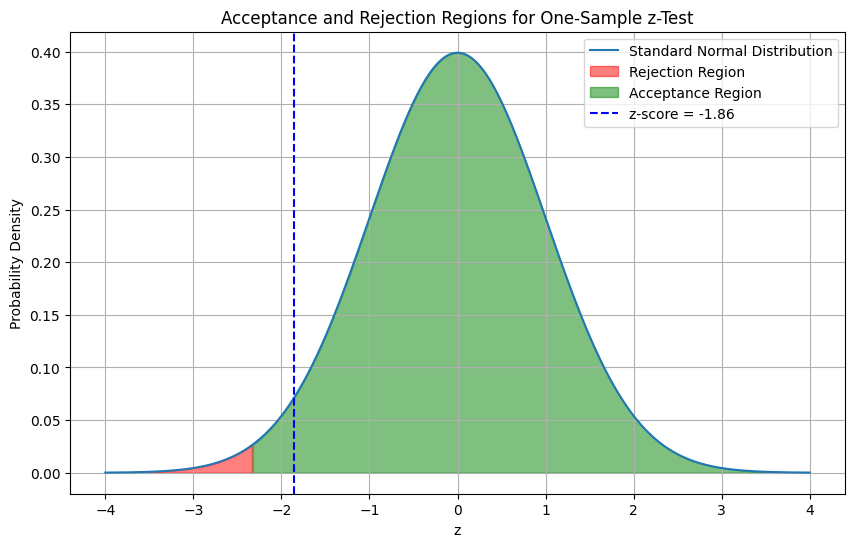

z-score: -1.86
p-value: 0.0314
Fail to reject the null hypothesis: There is not enough evidence to support the claim.


In [7]:
# Given data
sample_mean = 17.5
population_mean = 18
std_dev = 1.7
sample_size = 40
confidence_level = 0.99

# Calculate the standard error
standard_error = std_dev / np.sqrt(sample_size)

# Calculate the z-score
z_score = (sample_mean - population_mean) / standard_error

# Calculate the p-value
p_value = stats.norm.cdf(z_score)

# Determine the critical value for a one-tailed test at 99% confidence
z_critical = stats.norm.ppf(1 - confidence_level)

# Plotting the acceptance and rejection regions
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Standard Normal Distribution')

# Fill the rejection region
plt.fill_between(x, 0, y, where=(x < z_critical), color='red', alpha=0.5, label='Rejection Region')

# Fill the acceptance region
plt.fill_between(x, 0, y, where=(x >= z_critical), color='green', alpha=0.5, label='Acceptance Region')

# Plot the z-score
plt.axvline(z_score, color='blue', linestyle='--', label=f'z-score = {z_score:.2f}')

# Add labels and legend
plt.title('Acceptance and Rejection Regions for One-Sample z-Test')
plt.xlabel('z')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

# Print the z-score and p-value
print(f"z-score: {z_score:.2f}")
print(f"p-value: {p_value:.4f}")

# Conclusion
if z_score < z_critical:
    print("Reject the null hypothesis: The mean diameter is less than 18 mm.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to support the claim.")

#### 3d) Two catalysts are being analyzed to determine how they affect the mean yield of a chemical process. Specifically, catalysts 1 is currently in use, but catalyst 2 is acceptable. Since catalyst is cheaper, it should be adopted, providing it does not change the process yield. A test is run in the pilot plant and results in the data shown table. Is there any difference in mean yields for an α =.05 and assume equal variances

```
Number	     1	     2	   3	   4	    5	    6	    7	   8
Catlayst1	91.50	94.18	92.18	95.39	91.79	89.07	94.72   89.21
Catalyst2	89.19	90.95	90.46	93.21	97.19	97.04	91.07   92.75

```

- i)	State the hypothesis and type of test to be used                    2 marks
- ii)	Test the hypothesis and conclude                                    4 marks

#### i) State the hypothesis and type of test to be used
*  Null Hypothesis (
H
0
): There is no difference in the mean yields of the two catalysts.

    H
0
:
μ
1
=
μ
2
* Alternate Hypothesis (
H
1
): There is a difference in the mean yields of the two catalysts.

    H
1
:
μ
1
≠
μ
2
* Type of Test: We will use a two-sample t-test assuming equal variances to compare the means of the two catalysts.

In [8]:
# Given data
catalyst1 = np.array([91.50, 94.18, 92.18, 95.39, 91.79, 89.07, 94.72, 89.21])
catalyst2 = np.array([89.19, 90.95, 90.46, 93.21, 97.19, 97.04, 91.07, 92.75])

# Calculate means
mean1 = np.mean(catalyst1)
mean2 = np.mean(catalyst2)

# Calculate standard deviations
std1 = np.std(catalyst1, ddof=1)
std2 = np.std(catalyst2, ddof=1)

# Calculate pooled standard deviation
n1 = len(catalyst1)
n2 = len(catalyst2)
pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))

# Calculate t-statistic
t_statistic = (mean1 - mean2) / (pooled_std * np.sqrt(1/n1 + 1/n2))

# Degrees of freedom
df = n1 + n2 - 2

# Critical t-value for two-tailed test with alpha = 0.05
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df)

# Calculate p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))

# Print results
print(f"Mean of Catalyst 1: {mean1:.2f}")
print(f"Mean of Catalyst 2: {mean2:.2f}")
print(f"Standard Deviation of Catalyst 1: {std1:.2f}")
print(f"Standard Deviation of Catalyst 2: {std2:.2f}")
print(f"Pooled Standard Deviation: {pooled_std:.2f}")
print(f"t-statistic: {t_statistic:.2f}")
print(f"Critical t-value: {t_critical:.2f}")
print(f"p-value: {p_value:.4f}")

# Conclusion
if abs(t_statistic) > t_critical:
    print("Reject the null hypothesis: There is a significant difference in the mean yields of the two catalysts.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean yields of the two catalysts.")

Mean of Catalyst 1: 92.25
Mean of Catalyst 2: 92.73
Standard Deviation of Catalyst 1: 2.39
Standard Deviation of Catalyst 2: 2.98
Pooled Standard Deviation: 2.70
t-statistic: -0.35
Critical t-value: 2.14
p-value: 0.7289
Fail to reject the null hypothesis: There is no significant difference in the mean yields of the two catalysts.


#### 3e) A multinational company had organized a presentation activity to test the soft skills of their 6 sales executives and then offered them a skill development course. After the completion of the course, the executives again appeared for the presentation and the scores before and after the course are recorded. Test the company's claim that the course was effective in developing soft skills with 95% confidence using the p-value technique.

    Consider the scores given in the file `paired_data.xlsx`
    please consider the first two attributes

1. Check if the attributes are normally distributed (2 marks)
2. State the null hypothesis and alternate hypothesis (1 mark)
3. Test the hypothesis and conclude. (3 marks)



In [ ]:
import io
import requests

# Load the data
url = FILE1  # Assuming FILE1 holds the URL to the Excel file
response = requests.get(url)
response.raise_for_status()  # Raise an exception for bad responses (4xx or 5xx)


try:
    data = pd.read_excel(FILE1, engine='openpyxl') # pd.read_excel(io.BytesIO(response.content), engine='openpyxl')
except Exception as e:
    print(f"Error reading Excel file: {e}")
    # Add debugging or alternative handling if needed


# Extract the first two attributes (scores before and after the course)
before_scores = data.iloc[:, 0]
after_scores = data.iloc[:, 1]

# Perform the Shapiro-Wilk test
shapiro_before = stats.shapiro(before_scores)
shapiro_after = stats.shapiro(after_scores)

print(f"Shapiro-Wilk test for before scores: W={shapiro_before[0]:.4f}, p-value={shapiro_before[1]:.4f}")
print(f"Shapiro-Wilk test for after scores: W={shapiro_after[0]:.4f}, p-value={shapiro_after[1]:.4f}")

# Conclusion
if shapiro_before[1] > 0.05 and shapiro_after[1] > 0.05:
    print("Both attributes are normally distributed.")
else:
    print("At least one of the attributes is not normally distributed.")

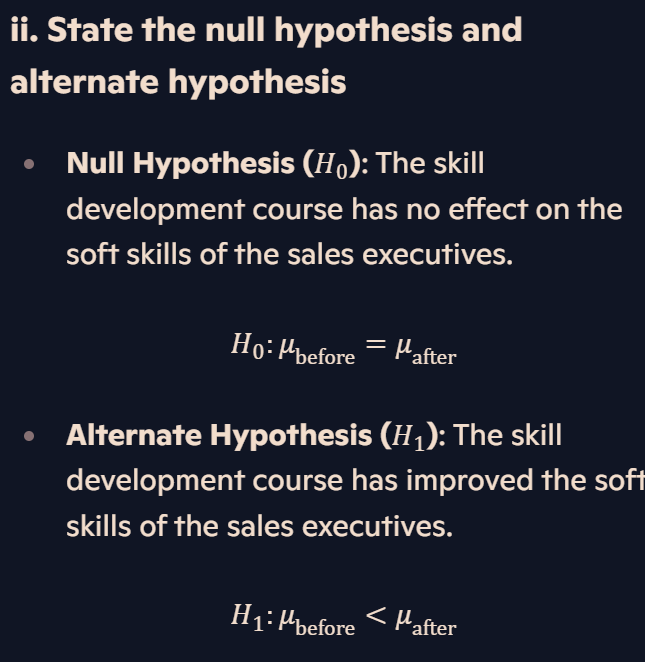

In [10]:
!pip install openpyxl

In [ ]:
# Perform the paired t-test
t_statistic, p_value = stats.ttest_rel(before_scores, after_scores, alternative='less')

print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The skill development course has improved the soft skills of the sales executives.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to support the claim that the course has improved the soft skills.")

# Section C

### 4a) Consider the admission.xlsx file and answer the following questions


DATA DESCRIPTION:
The data set consists of complete educational details of students right from their schooling to MBA and previous work experience. Our main objective is to predict the Salary of the students based on the info available
ATTRIBUTES:

    SlNo - ID of the student
    Gender - Gender of Student
    Percent_SSC - Percentage of marks scored in SSC
    Board_SSC - Types of Boards in SSC
    Percent_HSC - Percentage of marks scored in HSC
    Board_HSC - Types of Boards in HSC
    Stream_HSC - Specialization in HSC
    Percent Degree - Percentage of marks scored in Degree
    Course_Degree - Different courses in degree
    Experience_Yrs - Work Experience of the Students
    Entrance_Test - Test which students give for MBA college Entrance
    Percentile_ET - Percentage of marks scored in Entrance_Test
    Percent_MBA - Percentage of marks scored in MBA
    Specialization_MBA - Specialization in MBA
    Marks Communication - Percentage of marks scored in Communication
    Marks_Projectwork - Percentage of marks scored in Project Work
    Placement - Whether Student got placed or not
    Salary - Salary of students


In [ ]:
df = pd.read_excel('admission.xlsx')
# display first five observations using head()
df.head()

,SlNo,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,Percentile_ET,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Placement,Salary
0,1,M,62.00,Others,88.00,Others,Commerce,52.00,Science,0,MAT,55.0,58.80,Marketing & HR,50.0,65.0,Placed,270000
1,2,M,76.33,ICSE,75.33,Others,Science,75.48,Computer Applications,1,MAT,86.5,66.28,Marketing & Finance,69.0,70.0,Placed,200000
2,3,M,72.00,Others,78.00,Others,Commerce,66.63,Engineering,0,NaN,0.0,52.91,Marketing & Finance,50.0,61.0,Placed,240000
3,4,M,60.00,CBSE,63.00,CBSE,Arts,58.00,Management,0,MAT,75.0,57.80,Marketing & Finance,54.0,66.0,Placed,250000
4,5,M,61.00,CBSE,55.00,ISC,Science,54.00,Engineering,1,MAT,66.0,59.43,Marketing & HR,52.0,65.0,Placed,180000


###### 4a.i)Provide a summary statistics of all the variables and explain which variables has high variability (3 mark) <br> List out the numerical and categorical features in the dataset (2 marks) <br>  (Total- 5marks)



### 4a.ii)Provide a histogram for the variable salary and Percentage of marks scored in MBA, based on histogram and cacluation of skewness and kurtosis what would you describe. (5 marks)



### 4a.iii) Draw a boxplot for salary based on different MBA specialization, what do you observe in terms of outliers, and salary difference for specialization segments. (5 marks)



### 4a.iv) Draw a scatter plot for all of the variables, what is your observation and conclusion for the relationship between students salary and  the other numeric variables (5 marks)


### 4b. Consider the admission.csv file and answer the following questions

### 4b.i)  Check whether the percentile in entrance test from the data follows normal distribution by using a proper plot and with suitable statistical test. (5 marks)

### 4b.ii)Conduct a hypothesis to see whether there is a difference in terms of salary for students degree specialization of management and engineering. What do you conclude (consider level of significance 0.05) (5 marks)

### 4b.iii)Conduct an hypothesis to prove whether the salary of a student from commenrce stream is higher than Science stream, do you agree or not. (consider level of significance 0.05)  (5 marks)



### 4b.iv)Conduct an ANOVA to check whether there is salary difference for students with diffetent MBA_specialization of Marketing & Finance , Marketing & HR, Operations & Management, Marketing & IB. State your inferences. (consider level of significance 0.05)  (5 marks)




